In [6]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%run "./common_init.ipynb"

In [8]:
%autoreload 2
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load custom code
import kdd98.data_handler as dh
from kdd98.config import Config
import pickle

In [9]:
data_provider = dh.KDD98DataProvider("cup98LRN.txt")

Before encoding categorical features

In [13]:
preprocessed = data_provider.preprocessed_data

With onehot / binary encoded categories and other feature engineering (zip codes to coordinates, etc.)

In [14]:
numeric = data_provider.numeric_data

In [16]:
numeric["targets"]

,TARGET_B,TARGET_D
CONTROLN,,
95515,0,0.0
148535,0,0.0
15078,0,0.0
172556,0,0.0
7112,0,0.0
47784,0,0.0
62117,0,0.0
109359,0,0.0
75768,0,0.0


In [10]:
# Where to save the figures
PROJECT_ROOT_DIR = "../../"
CHAPTER_ID = "feature_extraction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "figures", CHAPTER_ID)

if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

def save_fig(fig_id, tight_layout=True, fig_extension=["pdf", "png"], resolution=300):
    if tight_layout:
        plt.tight_layout()
    [plt.savefig(pathlib.Path(IMAGES_PATH, fig_id + "." + f), 
                 format=f,
                 dpi=resolution,
                 transparent=True,
                 bbox_inches='tight') for f in fig_extension]

## Finding relevant features

In [57]:
with open(pathlib.Path(Config.get("df_store"), "Xy_imputed_median.pd.pkl"), "rb") as f:
    Xy = pickle.load(f)

In [33]:
with open(pathlib.Path(Config.get("df_store"), "X_train.pd.pkl"), "rb") as f:
    X_train = pickle.load(f)
with open(pathlib.Path(Config.get("df_store"), "y_train.pd.pkl"), "rb") as f:
    y_train = pickle.load(f)
with open(pathlib.Path(Config.get("df_store"), "X_val.pd.pkl"), "rb") as f:
    X_val = pickle.load(f)
with open(pathlib.Path(Config.get("df_store"), "y_val.pd.pkl"), "rb") as f:
    y_val = pickle.load(f)

In [10]:
Xy["data"].describe()

,RECINHSE,AGE,AGEFLAG,HOMEOWNR,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBBOOKS,...,RFA_24R_P,RFA_24R_S,RFA_24R_U,RFA_24R_nan,DOMAINUrbanicity_C,DOMAINUrbanicity_R,DOMAINUrbanicity_S,DOMAINUrbanicity_T,DOMAINUrbanicity_U,DOMAINUrbanicity_nan
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,...,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000
mean,0.070253,61.707972,0.910703,0.781684,1.068513,3.911625,6.652455,3.321438,0.067832,0.497956,...,0.009831,0.149583,0.000262,0.387509,0.206358,0.207416,0.229782,0.204660,0.127510,0.024274
std,0.255575,14.451513,0.285173,0.413105,0.340549,1.635685,2.025250,9.306899,0.322884,1.245737,...,0.098664,0.356664,0.016185,0.487184,0.404692,0.405458,0.420695,0.403455,0.333545,0.153898
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.000000,1.000000,1.000000,1.000000,3.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,62.000000,1.000000,1.000000,1.000000,4.000000,7.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,71.000000,1.000000,1.000000,1.000000,5.000000,7.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,98.000000,1.000000,1.000000,7.000000,7.000000,10.000000,241.000000,6.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
Xy["targets"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Data columns (total 2 columns):
TARGET_B    95412 non-null object
TARGET_D    95412 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


### Boruta

In [23]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [24]:
help(BorutaPy)

Help on class BorutaPy in module boruta.boruta_py:

class BorutaPy(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Improved Python implementation of the Boruta R package.
 |  
 |  The improvements of this implementation include:
 |  - Faster run times:
 |      Thanks to scikit-learn's fast implementation of the ensemble methods.
 |  - Scikit-learn like interface:
 |      Use BorutaPy just like any other scikit learner: fit, fit_transform and
 |      transform are all implemented in a similar fashion.
 |  - Modularity:
 |      Any ensemble method could be used: random forest, extra trees
 |      classifier, even gradient boosted trees.
 |  - Two step correction:
 |      The original Boruta code corrects for multiple testing in an overly
 |      conservative way. In this implementation, the Benjamini Hochberg FDR is
 |      used to correct in each iteration across active features. This means
 |      only those features are included in the correction which are still in
 |  

In [48]:
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1,
                            max_depth=6,
                            class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(rf,
                         n_estimators='auto',
                         max_iter=120,
                         perc=95,
                         verbose=10,
                         random_state=Config.get("random_seed"))

In [49]:
feat_selector = BorutaPy(rf,
                         n_estimators='auto',
                         max_iter=120,
                         perc=100, # controls how conservatively we select features. Lower means more false positives
                         verbose=2,
                         random_state=Config.get("random_seed"))
feat_selector.fit(Xy["data"].values, Xy["targets"].loc[:,"TARGET_B"].astype("int64").values)

Iteration: 	1 / 120
Confirmed: 	0
Tentative: 	653
Rejected: 	0
Iteration: 	2 / 120
Confirmed: 	0
Tentative: 	653
Rejected: 	0
Iteration: 	3 / 120
Confirmed: 	0
Tentative: 	653
Rejected: 	0
Iteration: 	4 / 120
Confirmed: 	0
Tentative: 	653
Rejected: 	0
Iteration: 	5 / 120
Confirmed: 	0
Tentative: 	653
Rejected: 	0
Iteration: 	6 / 120
Confirmed: 	0
Tentative: 	653
Rejected: 	0
Iteration: 	7 / 120
Confirmed: 	0
Tentative: 	653
Rejected: 	0
Iteration: 	8 / 120
Confirmed: 	57
Tentative: 	42
Rejected: 	554


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 120
Confirmed: 	57
Tentative: 	42
Rejected: 	554


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 120
Confirmed: 	57
Tentative: 	42
Rejected: 	554


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 120
Confirmed: 	57
Tentative: 	42
Rejected: 	554


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 120
Confirmed: 	57
Tentative: 	27
Rejected: 	569


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 120
Confirmed: 	57
Tentative: 	27
Rejected: 	569


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 120
Confirmed: 	57
Tentative: 	27
Rejected: 	569


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 120
Confirmed: 	57
Tentative: 	27
Rejected: 	569


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 120
Confirmed: 	57
Tentative: 	22
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 120
Confirmed: 	57
Tentative: 	22
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 120
Confirmed: 	57
Tentative: 	22
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 120
Confirmed: 	57
Tentative: 	18
Rejected: 	578


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 120
Confirmed: 	57
Tentative: 	18
Rejected: 	578


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 120
Confirmed: 	57
Tentative: 	18
Rejected: 	578


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 120
Confirmed: 	57
Tentative: 	10
Rejected: 	586


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 120
Confirmed: 	57
Tentative: 	10
Rejected: 	586


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 120
Confirmed: 	57
Tentative: 	10
Rejected: 	586


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 120
Confirmed: 	57
Tentative: 	10
Rejected: 	586


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 120
Confirmed: 	57
Tentative: 	6
Rejected: 	590


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 120
Confirmed: 	57
Tentative: 	6
Rejected: 	590


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 120
Confirmed: 	57
Tentative: 	6
Rejected: 	590


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 120
Confirmed: 	57
Tentative: 	6
Rejected: 	590


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 120
Confirmed: 	57
Tentative: 	5
Rejected: 	591


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 120
Confirmed: 	57
Tentative: 	5
Rejected: 	591


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 120
Confirmed: 	57
Tentative: 	4
Rejected: 	592


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 120
Confirmed: 	57
Tentative: 	4
Rejected: 	592


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 120
Confirmed: 	57
Tentative: 	4
Rejected: 	592


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 120
Confirmed: 	57
Tentative: 	4
Rejected: 	592


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 120
Confirmed: 	57
Tentative: 	4
Rejected: 	592


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 120
Confirmed: 	57
Tentative: 	4
Rejected: 	592


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 120
Confirmed: 	57
Tentative: 	4
Rejected: 	592


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 120
Confirmed: 	57
Tentative: 	4
Rejected: 	592


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 120
Confirmed: 	57
Tentative: 	4
Rejected: 	592


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 120
Confirmed: 	57
Tentative: 	4
Rejected: 	592


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 120
Confirmed: 	57
Tentative: 	4
Rejected: 	592


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 120
Confirmed: 	57
Tentative: 	4
Rejected: 	592


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 120
Confirmed: 	57
Tentative: 	4
Rejected: 	592


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 120
Confirmed: 	57
Tentative: 	4
Rejected: 	592


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 120
Confirmed: 	57
Tentative: 	3
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 120
Confirmed: 	57
Tentative: 	3
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 120
Confirmed: 	57
Tentative: 	3
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	99 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	100 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	101 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	102 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	103 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	104 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	105 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	106 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	107 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	108 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	109 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	110 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	111 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	112 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	113 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	114 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	115 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	116 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	117 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	118 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593
Iteration: 	119 / 120
Confirmed: 	58
Tentative: 	2
Rejected: 	593


BorutaPy finished running.

Iteration: 	120 / 120
Confirmed: 	58
Tentative: 	0
Rejected: 	593


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=182, n_jobs=-1, oob_score=False,
            random_state=<mtrand.RandomState object at 0x7fa6f0495090>,
            verbose=0, warm_start=False),
     max_iter=120, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x7fa6f0495090>,
     two_step=True, verbose=2)

In [50]:
with open(pathlib.Path(Config.get("model_store"), "feature_selection_boruta.pkl"), "wb") as of:
    pickle.dump(feat_selector, of)

In [51]:
# check selected features
feat_selector.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [52]:
# check ranking of features
feat_selector.ranking_

array([277,   1, 443, 392, 381,  71, 287, 223, 363, 314, 368, 512, 378,
       511, 481, 346, 401, 360, 423, 331, 100, 113,  77, 202, 190, 180,
        69, 485, 458, 513, 500, 410, 435, 445, 496, 473, 515, 429, 372,
       397,   1,  32,  34,  31, 352, 328, 314, 252, 263,  13,  10, 289,
        57, 117, 475, 191, 302, 312, 310, 365, 126, 390, 418, 202,  35,
       116, 127, 104, 124, 205, 118, 119, 216, 159,  58, 171, 218, 267,
       207,  55, 124, 226, 192, 257, 239, 199,  79, 220,  92, 176,   5,
        97, 134, 177, 237,  80, 228, 279,  51,  66,  72, 130, 148, 178,
       167, 174, 242, 282, 284, 349,   1,   1, 108,  48,  90,  73, 171,
       199, 178,  73, 128,  82, 136, 185, 185,   7, 338,  15, 223, 231,
       273, 167,  56,  64,  52,  21, 145,   1,   1,   1,   1,   1,   9,
       237,  96, 140, 173, 293, 294, 141, 246, 255, 131, 142, 229, 320,
         1,   3,   7,  54,  27,  53,   1,   4,   1,   1,   1,   1,  75,
       150, 152, 164,  95,  11, 209, 109, 231,  18, 157, 124, 15

In [53]:
feature_names = Xy["data"].columns.values[feat_selector.support_]

In [54]:
feature_names

array(['AGE', 'PEPSTRFL', 'HV1', 'HV2', 'HVP1', 'HVP2', 'HVP3', 'HVP4',
       'HVP5', 'RP1', 'DMA', 'IC2', 'IC3', 'IC4', 'IC5', 'HHAS3', 'EC7',
       'POBC2', 'CARDPROM', 'NUMPROM', 'CARDPM12', 'NUMPRM12', 'RAMNT_14',
       'RAMNTALL', 'NGIFTALL', 'CARDGIFT', 'MINRAMNT', 'MAXRAMNT',
       'LASTGIFT', 'AVGGIFT', 'RFA_2F', 'RFA_2A', 'RFA_3F', 'RFA_3A',
       'RFA_4F', 'RFA_4A', 'RFA_5F', 'RFA_5A', 'RFA_6F', 'RFA_6A',
       'RFA_7F', 'RFA_7A', 'RFA_8F', 'RFA_8A', 'RFA_9F', 'RFA_9A',
       'RFA_11A', 'RFA_12A', 'RFA_13A', 'RFA_14A', 'RFA_15A', 'RFA_16A',
       'ZIP_longitude', 'LASTDATE_DELTA_MONTHS', 'MAXRDATE_DELTA_MONTHS',
       'ODATEDW_DELTA_YEARS', 'RFA_3R_S', 'RFA_4R_S'], dtype=object)

In [58]:
Xy_all_relevant = Xy.copy()

Xy_all_relevant["data"] = pd.DataFrame(feat_selector.transform(Xy["data"].values),
                                   columns = feature_names,
                                   index = Xy["data"].index)
Xy_all_relevant["feature_names"] = Xy["data"].columns.values.tolist()

with open(pathlib.Path(Config.get("df_store"), "Xy_all_relevant.pd.pkl"), "wb") as of:
    pickle.dump(Xy_all_relevant, of)

## PCA

A completely different approach to feature selection through PCA.

We can use the first $n$ principal components as new input features, compressing the information in the original data. 

In [59]:
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

In [60]:
scaled = preprocessing.StandardScaler().fit_transform(Xy["data"].values)
pca = decomposition.PCA(n_components=0.95)
pca.fit(scaled)
features_pca = pca.transform(scaled)

In [61]:
features_pca

array([[ 5.54832263e+00, -1.27380000e+01,  9.18663503e+00, ...,
        -2.53850294e-01,  8.15157269e-02,  1.03959739e-01],
       [-2.11531122e+01,  7.24868252e-01, -3.38091815e-01, ...,
        -7.12765530e-01, -3.20329713e-01,  5.31474176e-01],
       [ 7.81614792e+00, -1.05868549e+01,  5.06108265e+00, ...,
         6.55482179e-01,  6.72570633e-03,  5.10604001e-01],
       ...,
       [ 3.92533306e+00, -1.49181431e+00, -2.18465441e+00, ...,
        -6.18885886e-01, -5.03398485e-01,  3.20471990e-02],
       [-8.02389659e+00, -7.48061715e+00,  9.36808872e+00, ...,
        -4.24634587e-01,  4.64834534e-01,  1.84718444e-02],
       [-7.66594607e+00, -4.52467267e+00,  3.94814442e+00, ...,
        -3.10573286e-02,  8.60743423e-02, -2.45504288e-01]])

In [62]:
pca.components_

array([[ 0.00066436,  0.01904806,  0.00459083, ...,  0.0055132 ,
        -0.00503461, -0.00144575],
       [-0.00317863,  0.00290653, -0.00269118, ..., -0.02986225,
         0.05577906, -0.00214995],
       [ 0.02724358,  0.04505671, -0.00463347, ..., -0.01949199,
         0.02045932,  0.00563115],
       ...,
       [ 0.00192865, -0.00909539,  0.00073621, ..., -0.01004385,
         0.06116234,  0.05991661],
       [-0.00289661,  0.0029167 , -0.00759639, ..., -0.07489955,
        -0.017487  ,  0.06466446],
       [ 0.02625639,  0.02131605, -0.02834509, ...,  0.00362902,
         0.00484767,  0.00561891]])

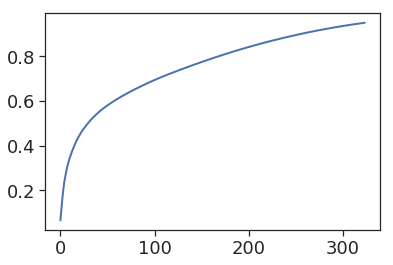

In [63]:
cum_var_expl = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot(data = cum_var_expl)
plt.xlabel = "Number of dimensions"
plt.ylabel = "Variance explained"

In [64]:
pca.n_components_

324

In [65]:
pca.n_features_

653

In [66]:
pca.get_params

<bound method BaseEstimator.get_params of PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>

## Sklearn SelectFromModel 

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=500, class_weight="balanced")
clf = clf.fit(Xy["data"].values, Xy["targets"].TARGET_B.astype("int").values)
clf.feature_importances_  

array([3.57965870e-04, 6.22585435e-03, 4.71046141e-04, 5.55908332e-04,
       4.04787339e-04, 2.36767583e-03, 1.83129437e-03, 2.29758556e-03,
       4.49354188e-04, 1.10338461e-03, 7.48818280e-04, 3.01008138e-04,
       2.59707793e-04, 3.15279679e-04, 3.28792597e-04, 8.52077672e-04,
       4.64005535e-04, 6.12675969e-04, 4.59443013e-04, 1.19043778e-03,
       4.17620813e-03, 4.43782145e-03, 4.24090662e-03, 3.45565585e-03,
       3.12292146e-03, 2.61894657e-03, 1.91244383e-03, 3.11592426e-04,
       4.14705806e-04, 4.35362508e-04, 3.97107759e-04, 4.67670485e-04,
       4.50041138e-04, 4.54374491e-04, 4.23029720e-04, 2.85173805e-04,
       3.51815372e-04, 3.58746137e-04, 4.43758189e-04, 4.26548515e-04,
       2.18939510e-03, 5.17618976e-03, 5.18679675e-03, 5.17421238e-03,
       6.73837186e-04, 1.24420012e-03, 1.25883428e-03, 2.07587919e-03,
       2.01776751e-03, 2.94884921e-03, 2.44081584e-03, 1.08092967e-03,
       1.74671649e-03, 2.39140919e-03, 5.49087644e-04, 5.70414354e-04,
      

In [70]:
importances = pd.DataFrame(data=clf.feature_importances_, index=Xy["data"].columns.values.tolist(), columns=["importance"])

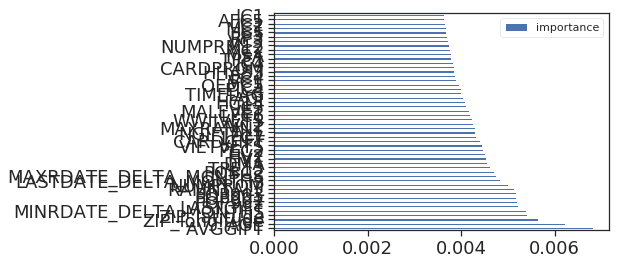

In [74]:
importances.sort_values(by="importance", ascending=False).head(50).plot(kind="barh")

In [ ]:
model = SelectFromModel(clf, prefit=True)
X_sfm = model.transform(Xy["data"].values)
X_sfm.shape               

In [ ]:
selected_features = Xy["data"].columns.values[model.get_support()]

In [ ]:
selected_features